In [69]:
from zget_data import get_responses, get_qdetails, page_map, attention
import pandas as pd
import json

In [70]:
password_response, time_response, survey_response = get_responses(4)

## Password Analysis

In [71]:
pd.DataFrame(password_response)

,password2,password2_recall1
0,Chevy68#,NaN
1,igahot6844$,NaN
2,aiw9h,NaN
3,idosath$,idostah$
4,Iw1p$itsiCbd,NaN
5,Iga5afft1m!w,Iga5afft1mw!


## Time Analysis

In [72]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,fcog,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,3.005,14.405,8.269,28.876,71.381,263.868,5.077,94.804,15.165,45.252,13.180,50.644,10.232100
1,47.552,27.253,9.852,122.930,47.599,223.082,24.884,69.051,16.381,40.184,21.445,95.529,12.429033
2,2.512,31.848,4.055,33.847,24.677,222.652,11.859,24.613,6.350,27.693,6.702,36.947,7.229250
3,8.542,18.450,18.806,18.907,178.445,227.250,28.855,138.733,12.831,42.447,33.652,40.444,12.789367
4,12.311,114.468,14.677,265.154,208.034,611.177,41.135,206.679,40.534,119.618,72.066,90.489,29.939033
5,2.048,10.998,5.543,31.115,46.391,155.886,12.730,40.817,9.442,28.042,36.618,34.226,6.897600


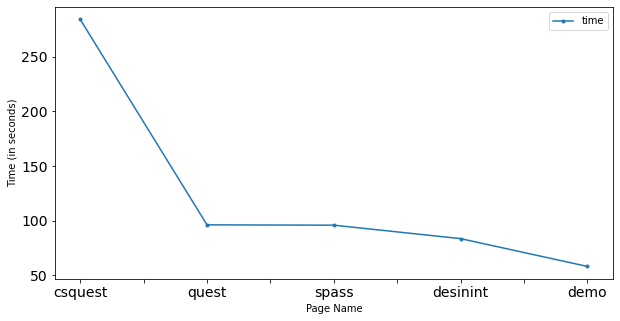

In [73]:
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

## Survey Response Analysis

In [74]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [75]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

,0,1,2,3,4,5,mean,median
structured,6.0,5.0,5.0,6.0,6.0,6.0,5.666667,6.000000
rewarding,6.0,6.0,5.0,6.0,6.0,6.0,5.833333,6.000000
helpful,6.0,6.0,5.0,6.0,6.0,6.0,5.833333,6.000000
well grouped,6.0,6.0,5.0,6.0,6.0,6.0,5.833333,6.000000
organized,7.0,5.0,5.0,6.0,6.0,6.0,5.833333,6.000000
beneficial,6.0,6.0,5.0,6.0,6.0,4.0,5.500000,6.000000
ordered,6.0,5.0,5.0,6.0,6.0,6.0,5.666667,6.000000
appealing,6.0,6.0,4.0,6.0,5.0,4.0,5.166667,5.166667
stylish,6.0,5.0,4.0,5.0,4.0,4.0,4.666667,4.666667
understandable,7.0,6.0,5.0,6.0,6.0,5.0,5.833333,6.000000


### CSQuest

In [76]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['9-1', '11-1']
csquestqual = csquest.loc[qualindex]
csquestqual

,0,1,2,3,4,5
9-1,"[Social Media, Gaming Websites]",[Social Media],[None of the above],"[Social Media, Email, Financial Websites, Test...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, Gove..."
11-1,I think the design looks nice and it was well ...,I think the strategy if easy to follow but I t...,I think that the presentation of this design i...,This was very interesting and something that I...,It is interesting and gets you involved. But i...,I think it is simple yet very informative. It ...


In [77]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,mean,median
Stimulates me to create a strong password,6.0,5.0,5.0,6.0,6.0,7.0,5.833333,6.000000
Makes me put trust on the presented password creation strategy,6.0,6.0,5.0,6.0,6.0,7.0,6.000000,6.000000
Encourages me to use the presented password creation strategy in real life,6.0,6.0,5.0,5.0,6.0,7.0,5.833333,6.000000
,6.0,6.0,5.0,6.0,7.0,7.0,6.166667,6.000000
,6.0,5.0,5.0,4.0,6.0,6.0,5.333333,5.333333
Encourages me to create a strong password,6.0,6.0,5.0,6.0,6.0,7.0,6.000000,6.000000
Makes me feel capable of creating a strong password,6.0,6.0,5.0,6.0,6.0,7.0,6.000000,6.000000
Makes me feel confident that I can create a strong password,6.0,6.0,5.0,7.0,6.0,7.0,6.166667,6.000000
,6.0,6.0,4.0,6.0,6.0,6.0,5.666667,6.000000
,6.0,6.0,5.0,6.0,6.0,6.0,5.833333,6.000000


### First Password Survey

In [78]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,mean,median
"I do not change my passwords, unless I have to.",2,6,4,5,3,2,3.666667,3.666667
I use different passwords for different online accounts that I have.,6,5,6,6,5,7,5.833333,6.000000
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",6,5,6,4,6,7,5.666667,6.000000
I do not include special characters in my password if it’s not required.,1,2,4,6,3,1,2.833333,2.833333


### Second Password Survey

In [79]:
spass = pd.DataFrame(survey_response_df['12'].to_dict())

qualindex = ['8-1']
spassqual = spass.loc[qualindex]
spassqual

,0,1,2,3,4,5
8-1,I used a variation of the strategy presented i...,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.


In [80]:
spassquant = spass.drop(qualindex).fillna(0).astype(int)
spassquant.drop(attention.get('8'), inplace=True)

normqsid = []
normspassquant = 8 - spassquant.loc[normqsid]
spassquant.update(normquest)

new_index = {}
for qsid in spassquant.index:
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spassquant = spassquant.rename(new_index)
spassquant['mean'] = spassquant.mean(axis=1)
spassquant['median'] = spassquant.median(axis=1)

spassquant

,0,1,2,3,4,5,mean,median
,6,6,3,7,6,7,5.833333,6.000000
Hard to remember,1,4,3,2,2,6,3.000000,3.000000
Can be easily guessed by a hacker,1,2,4,1,2,1,1.833333,1.833333
Can be easily guessed by my close friends or family members,1,2,4,1,2,1,1.833333,1.833333
Stronger than the passwords I usually use,5,5,3,7,4,7,5.166667,5.000000
,2,2,2,2,2,2,2.000000,2.000000
,5,6,3,6,6,7,5.500000,6.000000
,1,2,4,2,6,1,2.666667,2.000000


### Demographics

In [81]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo

,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,adoption security expert
0,Woman,50-54 years old,[White],High School Graduate,Business,Business or industry,Self-taught,Self-taught,6
1,Man,55-59 years old,[White],High School Graduate,Construction,Business or industry,Self-taught,No experience,7
2,Man,25-29 years old,[White],Four-year College Degree,Other areas of Engineering,Business or industry,Formal training,Formal training,4
3,Man,Above 65 years old,[White],Graduate degree (MS/Doctorate),"Computer Science/Engineering, and Information ...",Patrol officer,Pursuing or completed a degree,Pursuing or completed a degree,7
4,Man,Above 65 years old,[Asian],"3 years college, no degree","Mathematics, and Natural Sciences (Physics, Ch...",Transportation,Self-taught,No experience,7
5,Man,30-34 years old,[White],Four-year College Degree,Business,Business or industry,Self-taught,No experience,7


In [82]:
demo['gender'].value_counts()

Man      5
Woman    1
Name: gender, dtype: int64